# SVB, Inverted Curve And Bond Risk

### A short story by [Ashwin Rao](http://stanford.edu/~ashlearn)

You are wondering what the hell happened with Silicon Valley Bank (SVB) - it sounds like they didn't invest in any toxic assets like what happened in the [2008 Subprime Crisis](https://en.wikipedia.org/wiki/Subprime_mortgage_crisis). It appears that much of the problem was due to A) taking large deposits from startups and Venture Capitalists (who get large investment money from various sources for building highly innovative tech companies from scratch), then B) investing that money in bonds, and then C) losing money on those bonds when those depositors tried to take their money out. Most of these bond investments are (on the surface) "safe investments" - things like (US Government-backed) Treasury bonds and fairly safe Mortgage-backed securities (not the toxic subprime mortgage derivatives of the 2008 crisis). So what went wrong?

I will simplify the situation to make it easy to understand. I will only use high-school-level math and won't assume any knowledge of financial/investments math. We start with a little lesson of how a traditional bank used to make money, and then we understand how that strategy, seemingly safe on the surface, can lead to large losses (as what happened with SVB recently).

Back in the day, a bank would collect a lot of cash deposits from people (and institutions) who wanted to keep their money safe at the bank, and the bank would then invest that money in bonds that would fetch a healthy yield. The term *investing in bonds* means lending money to a bond-issuer (eg: US Government, for Treasury bonds) who will pay it back as Principal and Interest. The Principal payment is the return of the bond debt taken by the bond-issuer (Principal paid at maturity of the bond), and the Interest is typically paid twice a year until bond maturity. Let's say the bank collected `$100B` in deposits and paid the depositors 1% interest rate (annualized rate) on their deposits. Let's also say the bank invested in Treasury bonds that mature over several years (typically 5 or 10 or 30). Some of the longer maturity bonds fetched a healthy interest rate back in the day. Let's say the bank invested in bonds that fetched a 6% interest rate. Thus, they collect a net yield of 5% (= 6% - 1%) annually on the `$100B` in deposits. This is "free money" to the tune of `$5B` (= `$100B * 5%`). This sounds like an amazing business. We should all start a bank. Is there a catch?

Yes, there always is. For this, I need to explain some Math. Fear not - this will be high-school math. This is known as *Bond Math* (not the James Bond kind though!).

A bond has a time to maturity that we refer to as $T$ ($T$ can be 30 years or 10 years or 5 years or 2 years, and actually you can also do $T = 1$ year, half a year or quarter of a year). We will focus on situations where $T$ is large (*long-dated bonds*), the typical one being 30 years. A bond also has a *coupon*. Back in the day, a bond holder would get paper coupons that they could take to the friendly lady at the office of the institution who issued the bond, and she would give out the money stated on the coupon. The coupon is the regular interest payment a bond-issuer must make for the money they borrowed from the bond investor (when issuing the bond to the investor). So if the coupon (call it $C$) is 5% and a bond investor invested \$1M for maturity $T =$ 30 years, then each year (over 30 years), the friendly lady would give the bond investor `$1M * 5% = $50,000`. Typical Treasury bonds pay the coupon twice a year, but to keep things simple, we will work with once-a-year coupon payments.

The coupon is typically set to a value close to the prevailing market interest rate for the maturity of the bond (we call this market interest rate as the bond *yield*). So if the prevailing market interest rate (i.e., *yield*) for 30-year maturity was 6.1%, the bond-issuer would set the coupon to the nearby round number of 6%. To understand the relationship between maturity $T$, coupon $C$ and yield (call it $y$), we have to do some simple math, and specifically, we need to understand the concept of *Price of a bond*.

Let us assume that the bond-investor is SVB Bank and the bond issuer is the US Government (Treasury bonds).

Simply put, the Price of a bond (refered to as $P$) is the Current Value of the future Interest (i.e., Coupon) and Principal payments. The Principal is the return of borrowed money (borrowed by the bond-issuer) and we refer to it as $B$. So, the bond-issuer has to pay the bank $B \cdot C$ as interest every year for $T$ years (as interest payment in the form of coupons), and at the end of $T$ years, also has to pay the principal $B$.

We've already said that the conceptual way to think about yield $y$ is that it's the prevailing market interest rate for the maturity of the bond. The more opaque (computational) way to think about yield $y$ is that it's the rate at which we *discount* this collection of Interest and Principal payments in order to arrive at the Bond Price $P$. The calculation involves taking the future cash flows (Interest and Principal) and discounting it back to present time to arrive at current *Fair Value* of those future cash flows, and this current fair value is the Price, i.e., the money SVB Bank would give to the bond-issuer (upon bond purchase) as a fair (current) value for future Interest and Principal payments SVB bank would receive from the bond-issuer. There is a different (equivalent) way of thinking about it - instead of working back in time, move forward in time. SVB Bank is investing $P$ in the bond, and the bond-issuer gives SVB Bank cash flows in the future (Interest and Principal payments) which on average fetch an investment-growth rate (often refered to as *return*) equal to the yield $y$. Mathematically, this translates to:

$$P = \frac {B \cdot C} {1+y} + \frac {B \cdot C} {(1+y)^2} + \frac {B \cdot C} {(1 + y)^3} + \ldots + \frac {B \cdot C} {(1 + y)^{T-1}} + \frac {B \cdot C + B} {(1 + y)^T}$$

The powers of $(1+y)$ in the denominator are due to the fact that $y$ is considered to be an annualized yield.

**So much for the math, but intuitively remember that the yield on a bond at any point in time is just a reflection of the prevailing market interest rate for the maturity of that bond. Each maturity has it's own market interest rate, and so it gets it's own yield, which is what drives the Price of the bond for that maturity**.

The specific concept we are interested in now is the relationship between the yield $y$ and the Price $P$. We can see from the above equation that as yield $y$ increases, Price $P$ decreases. Let us write some code for this and plot this relationship.

In [1]:

def price_from_yield(
    yield_: float,
    coupon: float,
    maturity: int,
    principal: float
) -> float:
  # Note that yield is a special keyword in Python for generators
  # so we use variants like yield_ in the code below
  pv_of_interest: float = sum(principal * coupon / (1+ yield_) ** (i + 1)
                              for i in range(maturity))
  pv_of_principal: float = principal / (1 + yield_) ** maturity
  return pv_of_interest + pv_of_principal

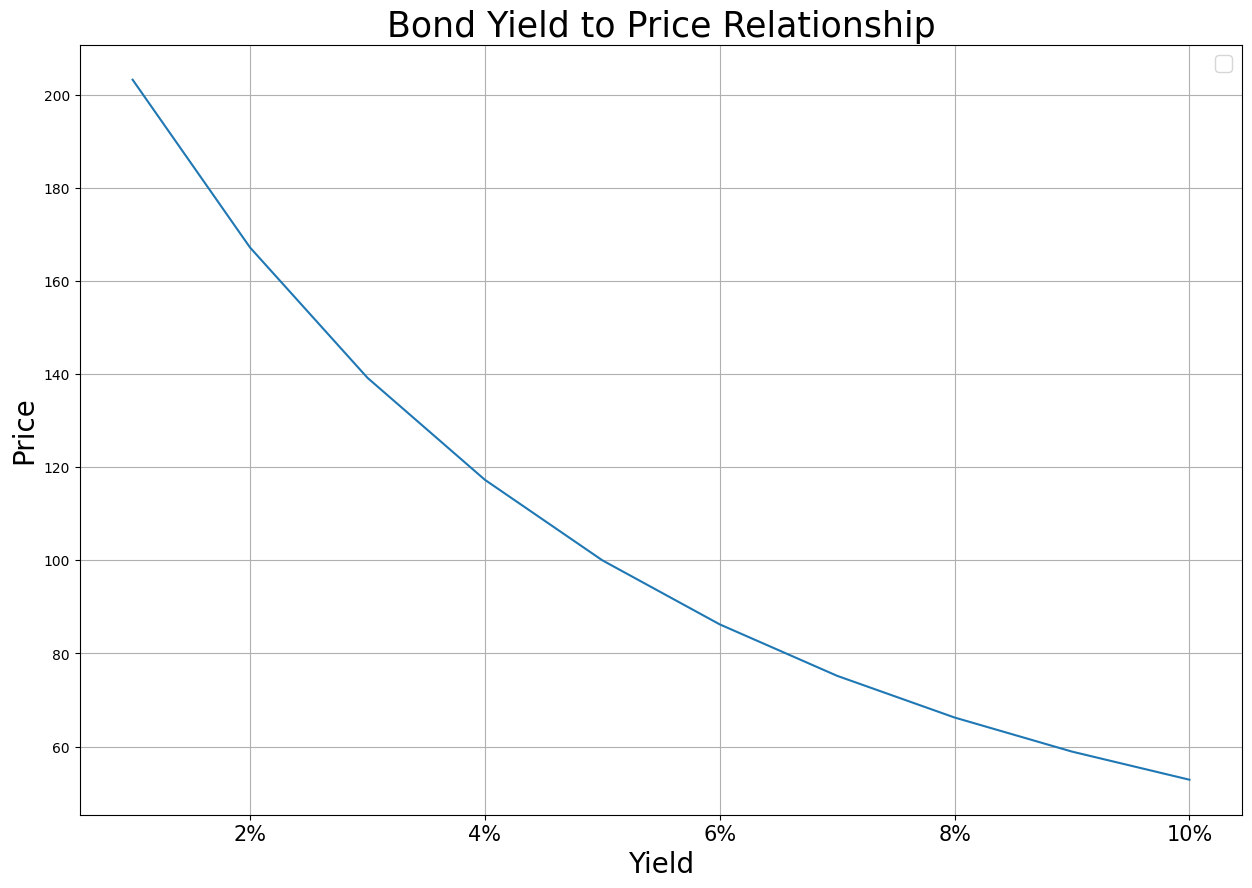

In [2]:
coupon: float = 0.05
maturity: int = 30
principal: float = 100.0

yields = [0.01 * n for n in range(1, 11)]
prices = [price_from_yield(y, coupon, maturity, principal) for y in yields]

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(yields, prices)
plt.xlabel("Yield", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.title("Bond Yield to Price Relationship", fontsize=25)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
plt.xticks(fontsize=15)
plt.grid(True)
plt.legend(fontsize=15)
plt.show()

Now you are ready to understand what happened with SVB. The following is a simplified account, to ease understanding of what happened.

Before 2020, market interest rates were low (read: *yields* were low). The short-term market interest rates were basically zero, and so depositors had to be paid pretty much zero interest on their deposits. The long-term market interest rates (i.e., yields on the bonds we described above) were also low, about 2%. So this meant a bank would collect an interest rate spread of 2% - 0% = 2% on their deposit amount. A few years ago, SVB invested about `$100B` in these bonds (of different maturities), hoping to collect `$2B` (= `$100B * 2%`) annually due to this interest-rate spread.

Cut to 2022 - with the Fed raising interest rates, the yields on bonds rose a lot. They rose a lot more for shorter maturity bonds versus longer maturity bonds, but overall, yields for bonds of all maturities rose considerably.

What this meant for SVB is that if they bought a bond for price $P_1$ at low yield $y_1$ and then two years later, when depositors came in large volumes to take out their deposits, SVB was forced to sell the bond in order to return the depositors' money. But now the yield on this bond is $y_2$, with $y_2$ significantly greater than $y_1$ (and corresponding price $P_2$, at which the sale has to happen, much lower than $P_1$). So they bought a bond for price $P_1$ and now had to sell that bond at a much lower price $P_2$, incuring a big loss of $P_1 - P_2$.

Let's use our `yield_to_price` function above to do this calculation.

In [3]:
coupon: float = 0.02
maturity_at_purchase: int = 30
principal: float = 100.0  # in billions of dollars
maturity_at_sale: int = 28

yield_at_purchase: float = 0.02
yield_at_sale: float = 0.05

purchase_price: float = price_from_yield(
    yield_at_purchase,
    coupon,
    maturity_at_purchase,
    principal
)

sale_price: float = price_from_yield(
    yield_at_sale,
    coupon,
    maturity_at_sale,
    principal
)

loss: float = purchase_price - sale_price
loss_percentage: float = loss / purchase_price

print(f"Purchase Price was {purchase_price:.0f} Billion Dollars")
print(f"Sale Price was {sale_price:.0f} Billion Dollars")
print(f"Loss was {loss:.0f} Billion Dollars")
print(f"Loss Percentage was {(loss_percentage * 100):.0f}%")




Purchase Price was 100 Billion Dollars
Sale Price was 55 Billion Dollars
Loss was 45 Billion Dollars
Loss Percentage was 45%


To compound matters, the short-term interest rates rose a lot over the past couple of years. I can now earn 5% annual return on a Treasury bond of maturity only 6 months. So a depositor can deposit a `$1M` and have `$1M` + Interest of `$25K` returned in just 6 months. Neat way to make `$25K` in just 6 months. If you are an early-stage startup who just raised some money, you can do exactly this because not all the money you raised would need to be consumed in the first 6 months. What this meant for SVB is that in the last few years, they had to pay the new depositors high interest rate on their deposits. In fact, higher than the coupons on the long-term bonds they invested in a few years ago. This is a double-whammy. Firstly, with interest rates rising, SVB's bond investments lost significantly on falling bond prices (as the above calculations showed). Secondly, we are now in an environment where short-term interest rates are actually higher than long-term interest rates, which makes it very painful for banks (having to give their depositors more interest than the interest they earn on their long-maturity investments). This phenonomenon of short-term interest rates being higher than long-term interest rates goes by the catchy term [*inverted yield curve*](https://www.weforum.org/agenda/2022/12/inverted-yield-curve-signal-economy-euro-dollar/).

**Disclaimer**: I have been super-busy the past few days developing code for my early-stage startup, and teaching my RL course at Stanford (and being a soccer-dad to a teenage girl!). As a result, I haven't had a chance to dig into SVB's exact investments and get into precise numbers. I just wanted to shed some light on the big picture here, and use these somewhat-simplified assumptions and calculations to illustrate the key concepts of what happened. In reality, there is a lot more detail to what happened with SVB. But what I wrote above is the foundation that caused this crisis for them.

This is the end of the SVB story. If you are mathematically inclined and want to understand Bond Math a bit more, I have a little treat for you below.

## Understanding Bond Risk with High-School Calculus

If you are mathematically inclined, you'd have said that I wrote Price as a function of yield, so why don't I take the derivative of Price with respect to yield, so as to give us a precise calculation of sensitivity of Bond Price with respect to changes in the yield?

This is exactly what we do now, except we will do this for a more general case of arbitrary cash flows, and not just for the specific case of a Treasury bond above where the interest payments are constant each year, and the entire Principal is paid back only at maturity. So here we assume that over the $T$ years, our cash flows are arbitrary, denoted: $C_1, C_2, \ldots, C_T$ respectively for years $1, 2, \ldots, T$. So then, the price formula (as a function of yield $y$) is:

$$P(y) = \sum_{i=1}^T \frac{C_i} {(1+y)^i}$$

Now take the derivative of $P$ with respect to $y$.

$$\frac {dP}{dy} = - \sum_{i=1}^T \frac {i \cdot C_i} {(1+y)^{i+1}}$$

But actually we are interested in the fractional decline in price per unit of increase in yield (since we are typically interested in the percentage change in the value, i.e., price of our investment). So we are talking about:

$$- \frac 1 P \cdot \frac {dP} {dy}$$

Let us calculate this:

$$- \frac 1 P \cdot \frac {dP} {dy} = \frac {\sum_{i=1}^T \frac {i \cdot C_i} {(1+y)^{i+1}}} {\sum_{i=1}^T \frac {C_i} {(1+y)^i}}$$

Let us write $\frac {C_i} {(1+y)^i}$ as $u_i$, so we get:

$$ - \frac 1 P \cdot \frac {dP} {dy} = \frac 1 {1+y} \cdot \frac {\sum_{i=1}^T u_i \cdot i} {\sum_{i=1}^T u_i}$$

Now we write $\frac {u_i} {\sum_{u=1}^T u_i}$ as $w_i$, meaning $w_i, 1 \leq i \leq T$, can be treated as weights between 0 and 1, adding up to 1. So,

$$ - \frac 1 P \cdot \frac {dP} {dy} = \frac 1 {1+y} \cdot \sum_{i=1}^T w_i \cdot i$$

So, if we ignore the factor $\frac 1 {1+y}$ (ok to ignore since it is $\approx 1$), the above expression can be conceptualized as the weighted average of the cashflow timings, with the weights being proportional to the discounted-to-current-time value of the cash flows (often refered to as *Present Value of the Cashflows*, abbreviated to PV).

With this interpretation as the weighted average of the cashflow timings, we refer to  $- \frac 1 P \frac {dP} {dy}$ ("percentage" decline in price per unit of yield increase) as **Duration** of a bond (with arbitrary cashflows).

We can visualize this as a plank of length 30 meters, and at each meter of the plank, we place a weight proportional to the PV of the cashflow of that year. Then, the duration is the position on the plank where the plank can be balanced with a wedge, i.e., the "center of mass".

Let us visualize this "plank with weights" for two types of bonds - first for a treasury bond (the one we discussed above), and then for a mortgage bond where some of the principal is paid together with the interest each year in a way such that the sum of the principal and interest payments is held constant across the years.

Let us write a function to calculate the duration according to the formula above, and let us write a function to plot the PV of cashflows to conceptualize them as weights along a plank (so you can visualize where the center of mass might be).

In [4]:
from typing import Sequence, List
import matplotlib.pyplot as plt

def duration(cash_flow: Sequence[float], yield_: float) -> float:
    pvs: Sequence[float] = [c / (1 + yield_) ** i for i, c in enumerate(cash_flow)]
    return sum(i * p for i, p in enumerate(pvs)) / sum(pvs) / (1 + yield_)

def plank_weights_plot(cash_flow: Sequence[float], yield_: float):
    pvs: Sequence[float] = [c / (1 + yield_) ** i for i, c in enumerate(cash_flow)]
    timings = [i for i in range(1, len(cash_flow) + 1)]
    ticks = [f"{i:d}" for i in timings]
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.bar(timings, pvs)
    plt.xticks(timings, ticks)
    plt.grid(axis='y')
    plt.xlabel("Timing of Cashflows")
    plt.ylabel("PV of Cashflows")
    plt.title("Weights on a Plank")
    plt.show()

Now let's apply these functions to the case of a treasury bond.

Bond Duration = 15.14


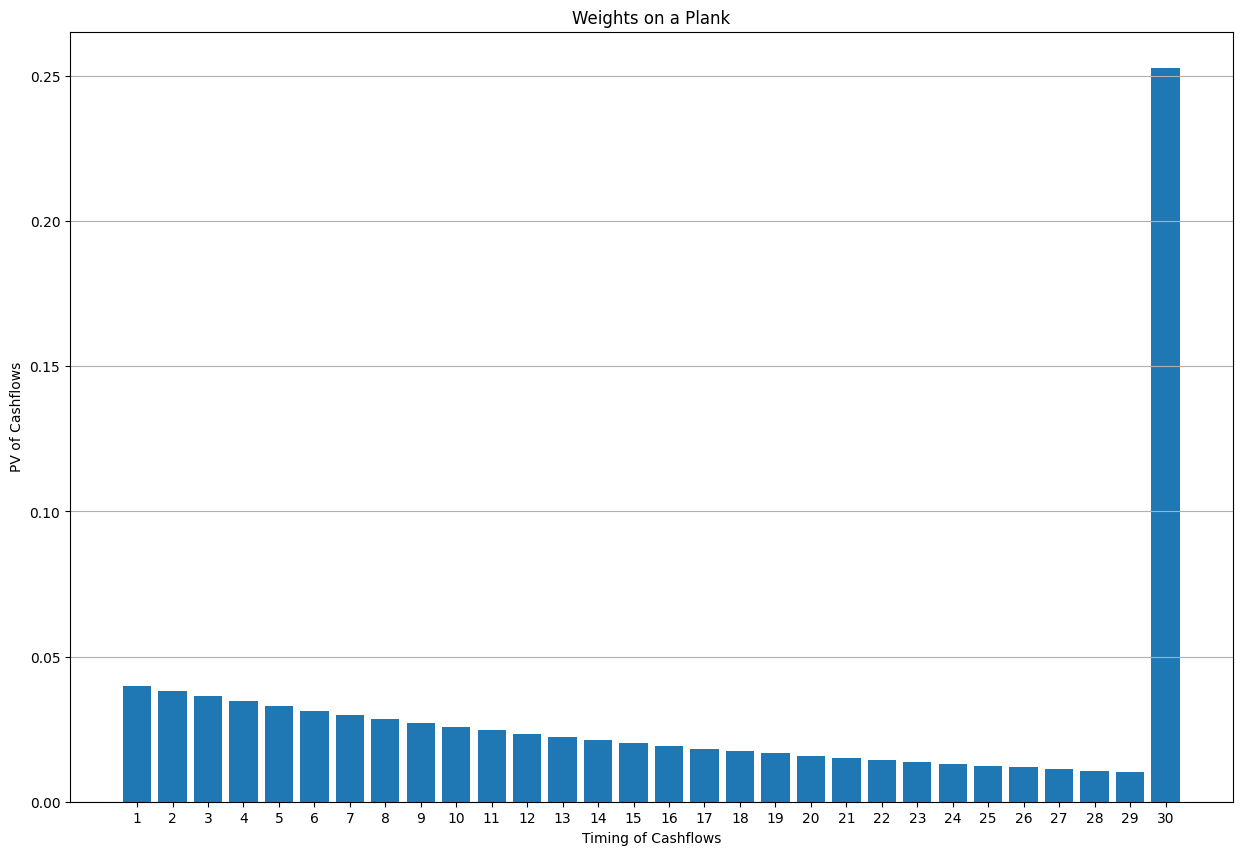

In [5]:
bond_coupon: float = 0.04
num_years: int = 30
yield_: float = 0.05
bond_cash_flow: List[float] = [bond_coupon] * num_years
bond_cash_flow[-1] += 1
bond_duration: float = duration(bond_cash_flow, yield_)

print(f"Bond Duration = {bond_duration:.2f}")
plank_weights_plot(bond_cash_flow, yield_)



Next, let's apply these functions to the case of a mortgage bond.

Mortgage Duration = 10.45


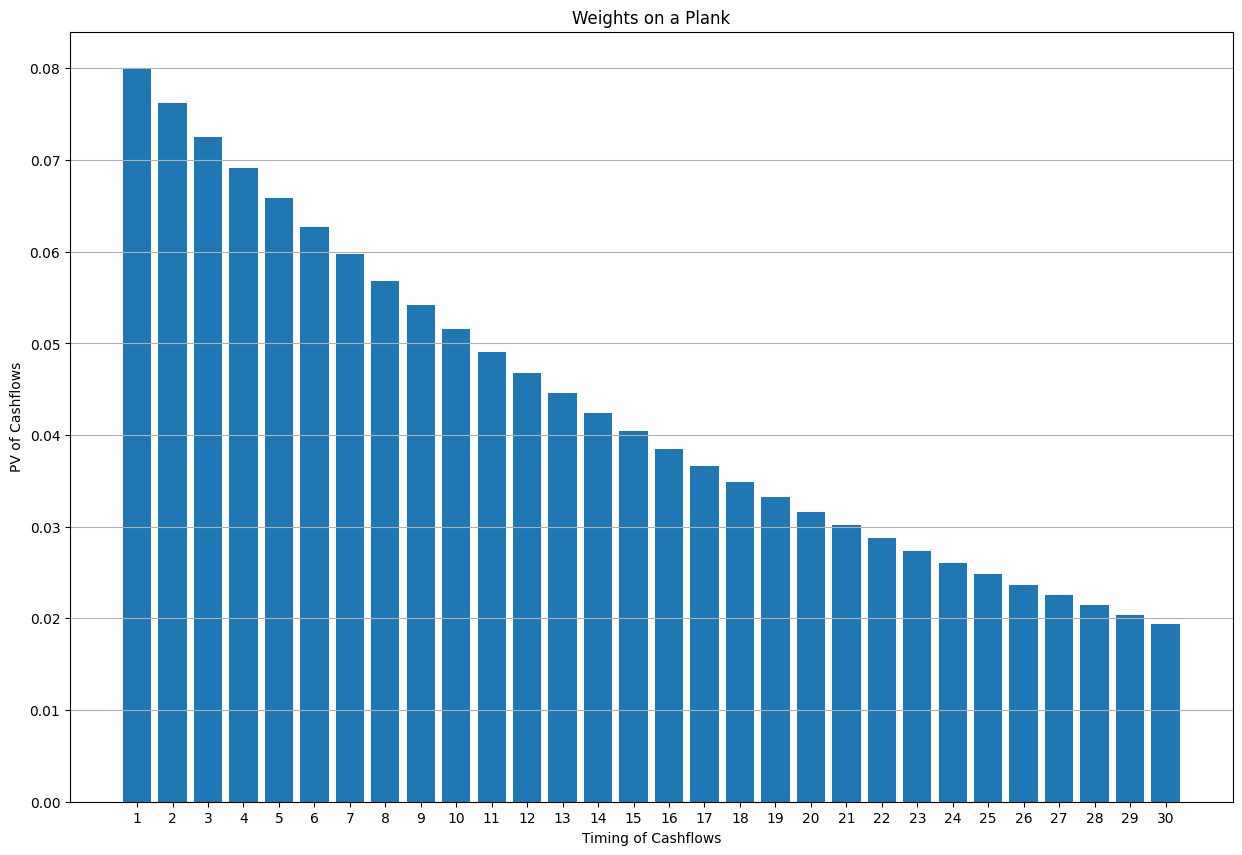

In [6]:
mortgage_principal_plus_interest: float = 0.08
mortgage_cash_flow: Sequence[float] = [mortgage_principal_plus_interest] * num_years
mortgage_duration: float = duration(mortgage_cash_flow, yield_)

print(f"Mortgage Duration = {mortgage_duration:.2f}")
plank_weights_plot(mortgage_cash_flow, yield_)

Thus, we see that the treasury duration is higher than mortgage duration because the "weights" (PV of cashflows) are loaded more to the back-end (as you can see in the plots). We also see that the typical duration of a treasury bond of 30-years maturity is about 15. This means, we will experience a 15% decline in the value of this Treasury bond for a sudden increase by 1% in the prevailing market interest rate (i.e, if the yield rises from say 4% to 5%). This intuition helps us quickly conceptualize what happened to SVB in the calculation we did earlier where the market interest rate jumped from 2% to 5%. A back-of-the-envelope calculation here tells us that the bond price should fall by about 15% times 3 = 45%, which is exactly what we got above in the detailed calculation earlier.

**If you've gotten this far, you have understood the nuanced topic of *Bond Risk*, specifically *Bond Duration*, quite well. So if anyone tells you bonds are "safe and boring" investments, you can pull out the above plank-plot and explain to them how risky bonds are, that a spike in the prevailing market interest rate can seriously diminish the value of their bond investment. I'm sure SVB was well aware of this Bond Math, but perhaps they did not expect the speed of the increase in market interest rates and surely did not expect to have to sell bonds so quickly and in such high volumes on account of the flood of bank runs their depositors made to withdraw their money**.